In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-diseases-classification/dataset/glaucoma/1255_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1482_left.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_398_8823411.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_309_4110303.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_13_697490.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_205_310538.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/Glaucoma_040.png
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1256_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_221_3079640.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_392_9636183.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_12_5295071.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_399_7128170.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_113_8738972.jpg
/kaggle/input/eye-disea

Load data

In [2]:
dataset = os.listdir('/kaggle/input/eye-diseases-classification/dataset/')
print (dataset)
print("Types of classes labels found: ", len(dataset))

['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract']
Types of classes labels found:  4


Labels

In [3]:
class_labels = []

for item in dataset: 
 
 all_classes = os.listdir('/kaggle/input/eye-diseases-classification/dataset/' + '/' +item+'/')
 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [4]:
data = pd.DataFrame(data=class_labels, columns=['Labels', 'Image'])
data.head()

Labels                                   Image
0  glaucoma    dataset_path/glaucoma/1255_right.jpg
1  glaucoma     dataset_path/glaucoma/1482_left.jpg
2  glaucoma  dataset_path/glaucoma/_398_8823411.jpg
3  glaucoma  dataset_path/glaucoma/_309_4110303.jpg
4  glaucoma    dataset_path/glaucoma/_13_697490.jpg

In [5]:
import pathlib
data_dir = pathlib.Path("/kaggle/input/eye-diseases-classification/dataset")

preprocessing

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
batch_size = 32
img_height = 224
img_width = 224
train = image_dataset_from_directory(data_dir, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 4217 files belonging to 4 classes.
Using 3374 files for training.


In [7]:
val = image_dataset_from_directory(data_dir, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation',)

Found 4217 files belonging to 4 classes.
Using 843 files for validation.


In [8]:
input_shape=(224,224,3)
batch_size=64
classes=4

In [9]:
from tensorflow.keras.applications import DenseNet121
dense = DenseNet121(weights = "imagenet", include_top = False, input_shape=(224,224,3))

29084464/29084464 [==============================] - 0s 0us/step


In [10]:
for layer in dense.layers[:121]:
    layer.trainable = False

Modeling

In [11]:
from tensorflow.keras import Sequential,regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

In [14]:
model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation= "relu",kernel_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 1024)       4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3, 3, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
from tensorflow import keras, expand_dims, newaxis

In [18]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3,verbose=1)

In [17]:
history = model.fit(
    train,
    validation_data = val,
    epochs = 20,
    verbose = 1, 
    callbacks = callback
)

Epoch 1/15
106/106 [==============================] - 674s 6s/step - loss: 1.1975 - accuracy: 0.6707 - val_loss: 25.3675 - val_accuracy: 0.5457
Epoch 2/15
106/106 [==============================] - 641s 6s/step - loss: 0.6532 - accuracy: 0.8136 - val_loss: 23.5882 - val_accuracy: 0.6584
Epoch 3/15
106/106 [==============================] - 642s 6s/step - loss: 0.4947 - accuracy: 0.8542 - val_loss: 0.8970 - val_accuracy: 0.8256
Epoch 4/15
106/106 [==============================] - 662s 6s/step - loss: 0.4634 - accuracy: 0.8687 - val_loss: 0.7833 - val_accuracy: 0.8268
Epoch 5/15
106/106 [==============================] - 640s 6s/step - loss: 0.3667 - accuracy: 0.8782 - val_loss: 0.3404 - val_accuracy: 0.8921
Epoch 6/15
106/106 [==============================] - 667s 6s/step - loss: 0.3098 - accuracy: 0.8930 - val_loss: 0.2758 - val_accuracy: 0.9110
Epoch 7/15
106/106 [==============================] - 643s 6s/step - loss: 0.2824 - accuracy: 0.9034 - val_loss: 0.3485 - val_accuracy: 0.91

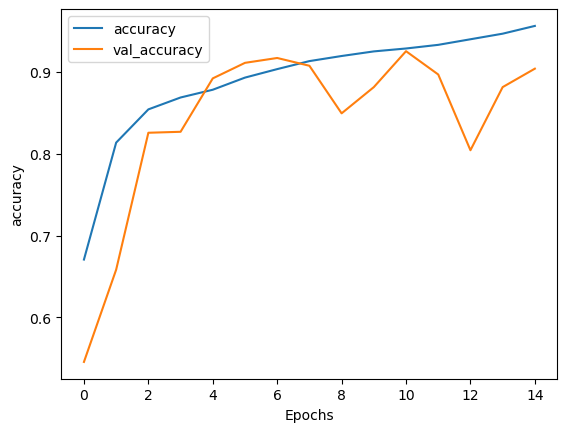

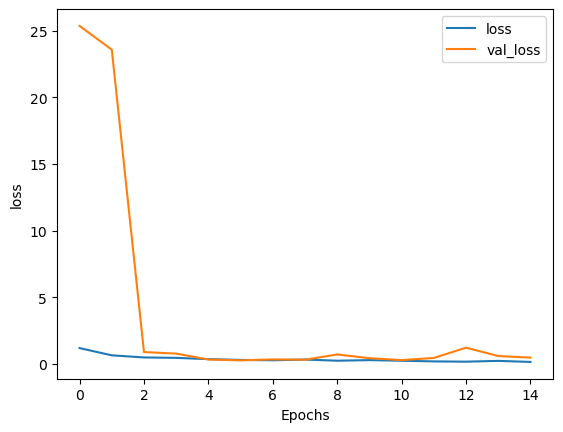

In [18]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
model.save("Modeleye.h5")

In [20]:
preformance = model.evaluate(val)

27/27 [==============================] - 60s 2s/step - loss: 0.4793 - accuracy: 0.9039


actual label: normal
1/1 [==============================] - 4s 4s/step
predicted label: normal


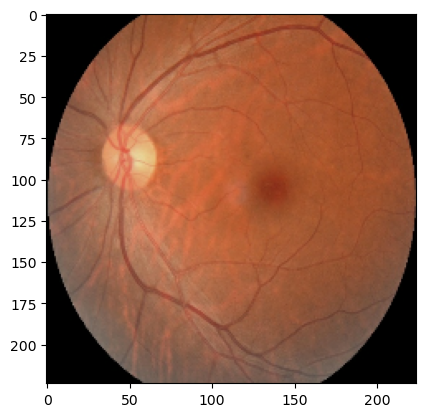

In [21]:
labels = train.class_names
labels
for images_batch, labels_batch in val.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

In [22]:
def predict(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

amazing!

1/1 [==============================] - 0s 125ms/step


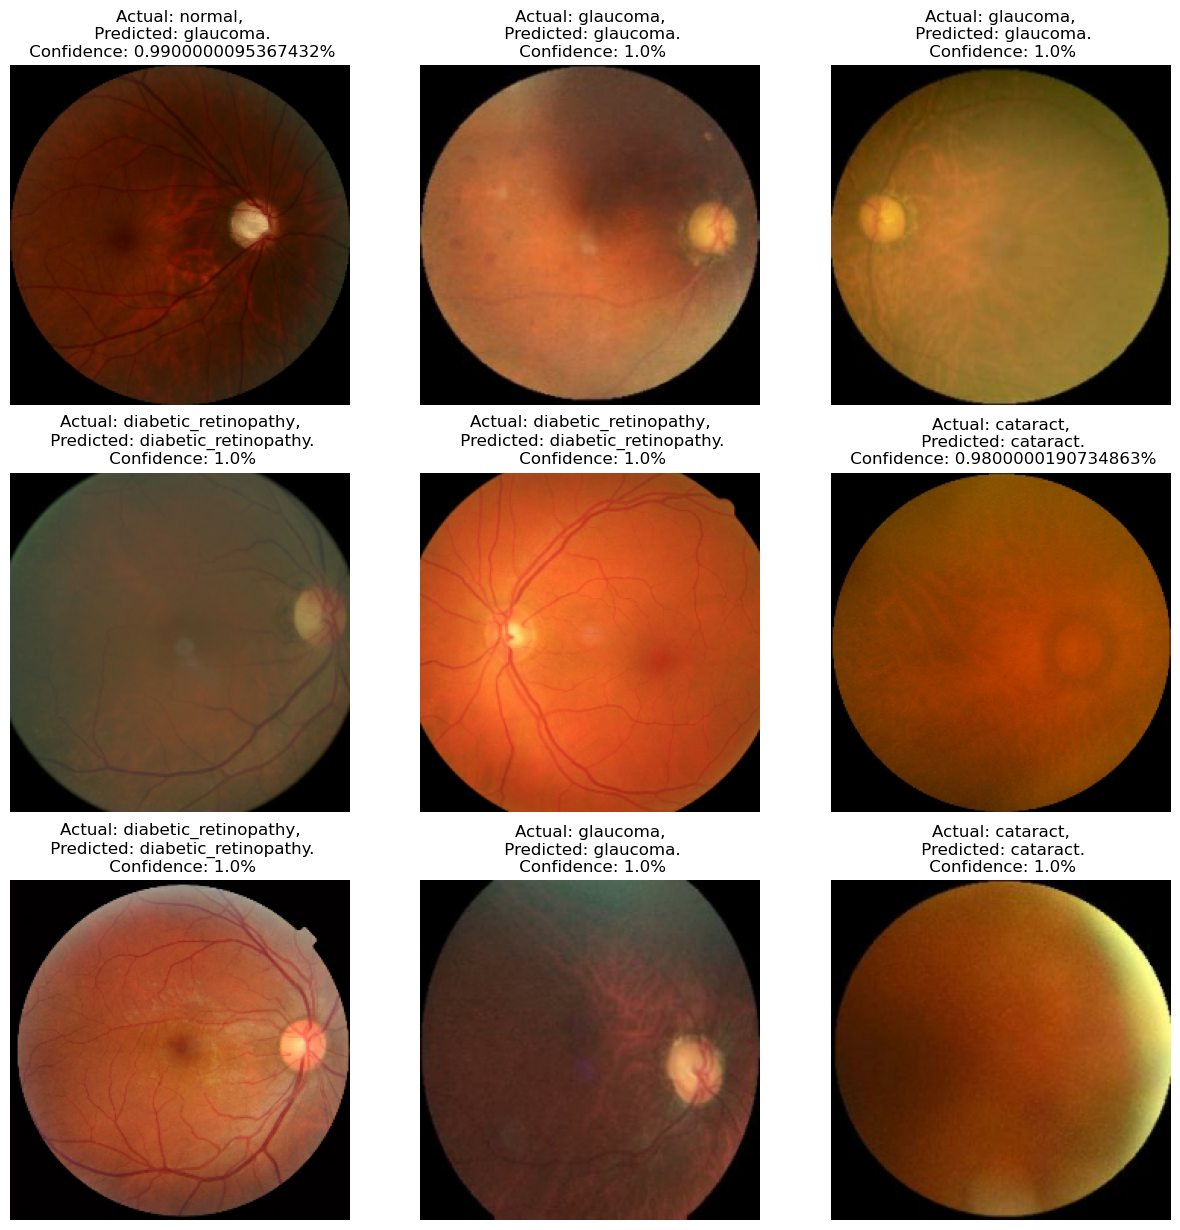

In [23]:
plt.figure(figsize=(15, 15))
for images, lbs in val.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

another model

In [24]:
cnn_model = Sequential()
#input layer
cnn_model.add(Conv2D(40, (3,3), activation='relu', input_shape=(224,224,3)))
cnn_model.add(MaxPooling2D((2,2)))
#layer 2
cnn_model.add(Conv2D(50, (3,3), activation='relu'))
cnn_model.add(Dropout(0.2))
#layer 3    
cnn_model.add(Conv2D(60, (3,3)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(0.1))
#layer 4
cnn_model.add(Conv2D(70, (3,3),kernel_regularizer=keras.regularizers.l2(1e-4)))
cnn_model.add(MaxPooling2D((2,2)))
#Flatten layer
cnn_model.add(Flatten())
#Output layer
cnn_model.add(Dense(4, activation = "softmax"))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 40)      1120      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 40)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 50)      18050     
                                                                 
 dropout_2 (Dropout)         (None, 109, 109, 50)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 60)      27060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 53, 60)       0         
 2D)                                                  

In [25]:
cnn_model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
cnn_history = cnn_model.fit(
    train,
    validation_data = val,
    epochs = 20,
    verbose = 1, 
    callbacks = callback
)

Epoch 1/15
106/106 [==============================] - 304s 3s/step - loss: 31.9300 - accuracy: 0.5270 - val_loss: 0.8000 - val_accuracy: 0.6679
Epoch 2/15
106/106 [==============================] - 303s 3s/step - loss: 0.7724 - accuracy: 0.6941 - val_loss: 0.6967 - val_accuracy: 0.7023
Epoch 3/15
106/106 [==============================] - 302s 3s/step - loss: 0.6933 - accuracy: 0.7128 - val_loss: 0.6989 - val_accuracy: 0.7129
Epoch 4/15
106/106 [==============================] - 302s 3s/step - loss: 0.6358 - accuracy: 0.7463 - val_loss: 0.6633 - val_accuracy: 0.7248
Epoch 5/15
106/106 [==============================] - 305s 3s/step - loss: 0.6179 - accuracy: 0.7496 - val_loss: 0.6703 - val_accuracy: 0.7141
Epoch 6/15
106/106 [==============================] - 303s 3s/step - loss: 0.5979 - accuracy: 0.7522 - val_loss: 0.6145 - val_accuracy: 0.7426
Epoch 7/15
106/106 [==============================] - 302s 3s/step - loss: 0.5745 - accuracy: 0.7647 - val_loss: 0.6415 - val_accuracy: 0.705

In [27]:
cnn_model.save("Modelcnneye.h5")

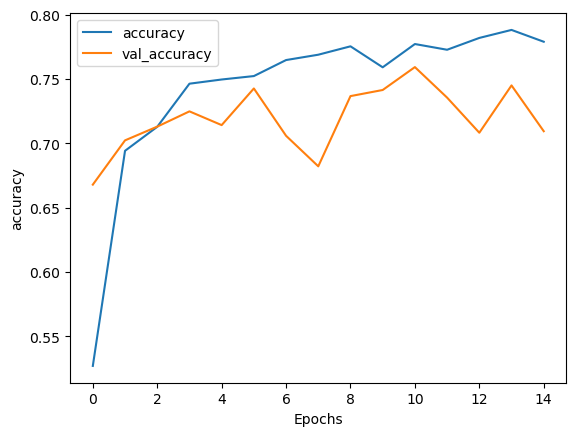

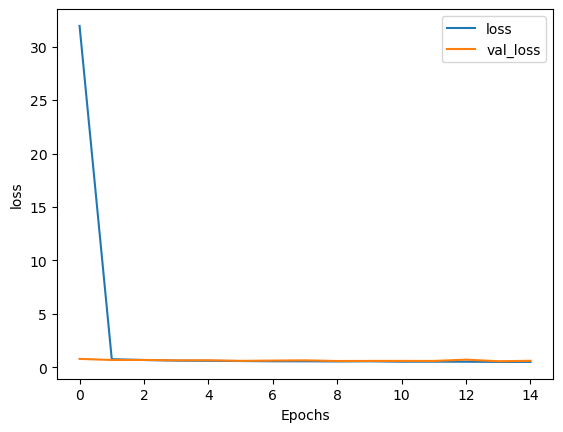

In [28]:
def plot_graphs(cnn_history,string):
    plt.plot(cnn_history.history[string])
    plt.plot(cnn_history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

plot_graphs(cnn_history, "accuracy")
plot_graphs(cnn_history, "loss")

In [29]:
preformance = cnn_model.evaluate(val)

27/27 [==============================] - 20s 700ms/step - loss: 0.6216 - accuracy: 0.7094


actual label: cataract
1/1 [==============================] - 1s 746ms/step
predicted label: glaucoma


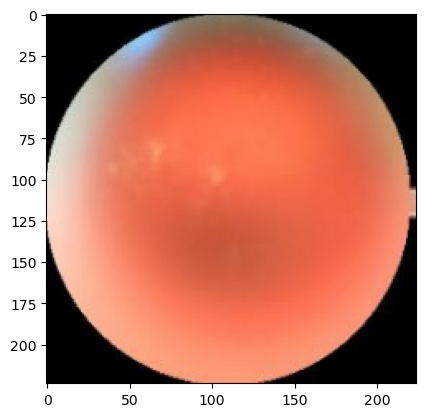

In [30]:
labels = train.class_names
labels
for images_batch, labels_batch in val.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = cnn_model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

1/1 [==============================] - 0s 49ms/step


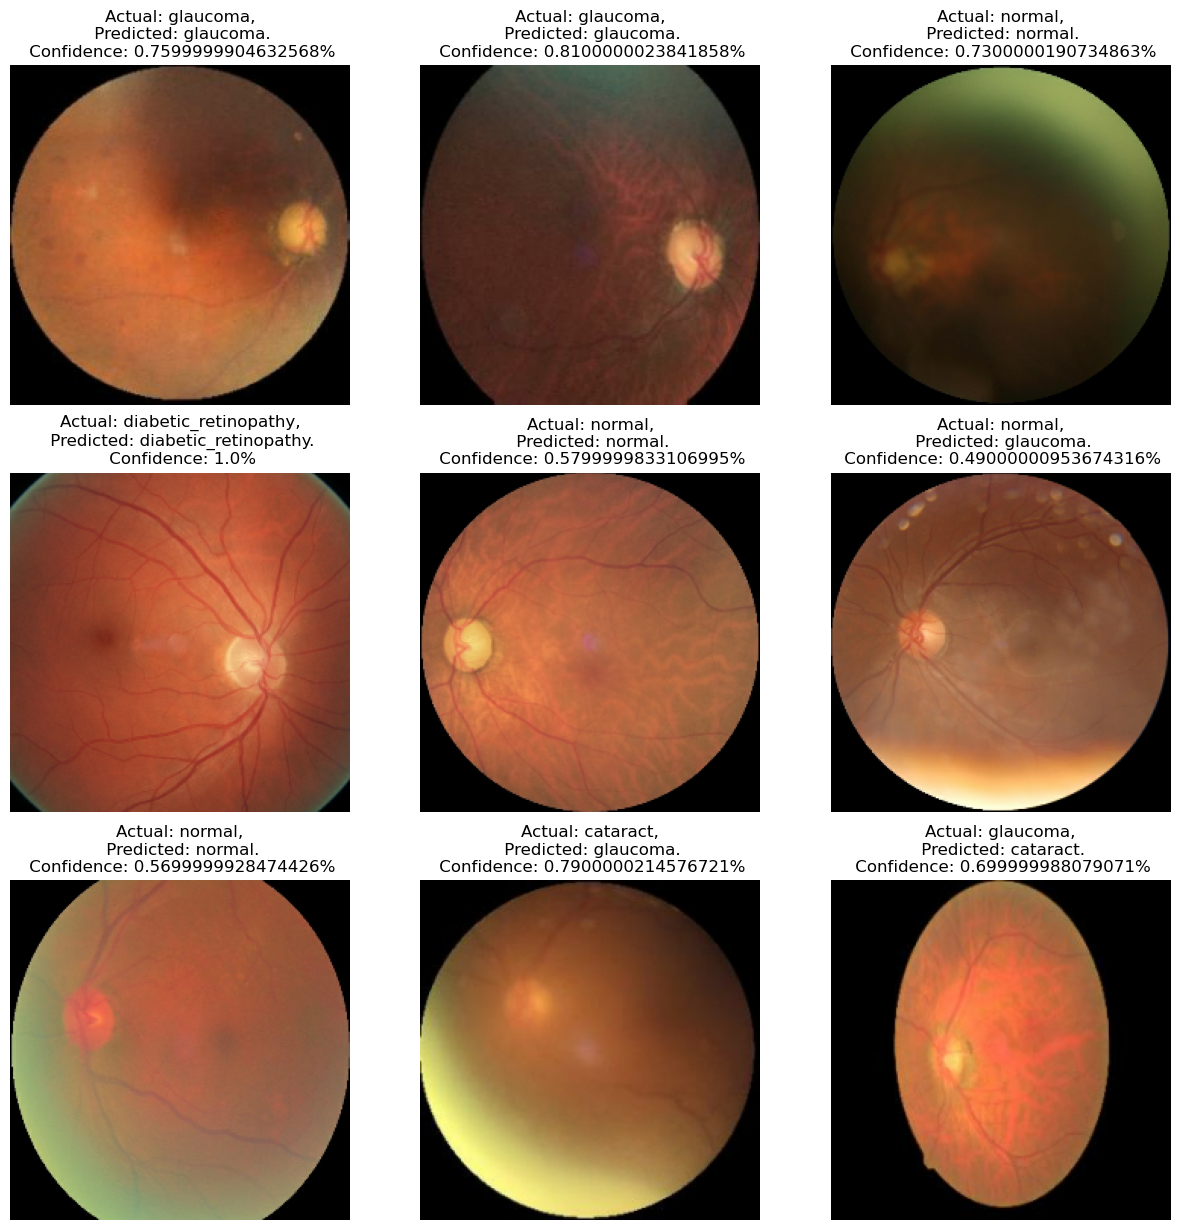

In [32]:
plt.figure(figsize=(15, 15))

for images, lbs in val.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(cnn_model, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

**for model tuning**

In [22]:
import keras_tuner as kt

In [24]:
def model_constructor(hp):
    model_tune = Sequential()
    #Input
    model_tune.add(Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)))
    model_tune.add(MaxPooling2D((3,3)))
    model_tune.add(BatchNormalization())
   
    
    # The number of filters is going to be a variable in this case
    hp_units = hp.Int('units', min_value=16, max_value=64, step=16)
    
    hp_padding = hp.Choice('padding', values=['same', 'valid'])
    
    # Layer 2
    model_tune.add(Conv2D(hp_units, (3,3), padding=hp_padding, activation='relu',kernel_regularizer=keras.regularizers.l2(1e-5)))
    model_tune.add(BatchNormalization())
    
    # Layer 3
    model_tune.add(Conv2D(hp_units, (3,3), padding=hp_padding, activation='relu',kernel_regularizer=keras.regularizers.l2(1e-4)))
    model_tune.add(MaxPooling2D((3,3)))
    model_tune.add(Dropout(0.25))
    model_tune.add(BatchNormalization())
    
    # Layer 4
    model_tune.add(Conv2D(hp_units, (3,3), padding=hp_padding, activation='relu',kernel_regularizer=keras.regularizers.l2(1e-3)))
    model_tune.add(BatchNormalization())
    
    # Layer 5
    model_tune.add(Conv2D(hp_units, (3,3), padding=hp_padding, activation='relu',kernel_regularizer=keras.regularizers.l2(1e-2)))
    model_tune.add(Dropout(0.2))
    model_tune.add(BatchNormalization())
    
    
    # Layer 6
    model_tune.add(Conv2D(64, (3,3), padding=hp_padding, activation=None))
    model_tune.add(MaxPooling2D((3,3)))
    model_tune.add(BatchNormalization())

    
    
    # Flatten layer
    model_tune.add(Flatten())
    
    # Output layer
    model_tune.add(Dense(4, activation='softmax'))
    
    # The number of the learning rate is going to be a variable in this case
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
    
    model_tune.compile(optimizer = keras.optimizers.RMSprop(learning_rate=hp_learning_rate), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model_tune

In [25]:
tunner = kt.Hyperband(
    model_constructor,
    objective = 'val_accuracy',
    max_epochs=5,
    factor=2,
)

In [26]:
tunner.search(
    train,
    epochs=5,
    validation_data=val   
)

best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]

Trial 21 Complete [00h 18m 38s]
val_accuracy: 0.5717675089836121

Best val_accuracy So Far: 0.7829181551933289
Total elapsed time: 03h 38m 34s


In [27]:
print('The Hyperparameters that give the highest accuracy are:')

print(f"Units: {best_hps.get('units')}")

print(f"Learining rate: {best_hps.get('learning_rate')}")

The Hyperparameters that give the highest accuracy are:
Units: 32
Learining rate: 0.01


In [28]:
hypermodel = tunner.hypermodel.build(best_hps)

hypermodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 74, 74, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 32)        18464     
                                                                 
 batch_normalization_7 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                      

In [30]:
history_hypermodel = hypermodel.fit(
    train,
    epochs=10,
    validation_data=val,
    callbacks = callback
)

Epoch 1/10
106/106 [==============================] - 213s 2s/step - loss: 0.8224 - accuracy: 0.7125 - val_loss: 0.7273 - val_accuracy: 0.7521
Epoch 2/10
106/106 [==============================] - 214s 2s/step - loss: 0.6762 - accuracy: 0.7608 - val_loss: 0.8214 - val_accuracy: 0.7106
Epoch 3/10
106/106 [==============================] - 213s 2s/step - loss: 0.6263 - accuracy: 0.7759 - val_loss: 0.6669 - val_accuracy: 0.7805
Epoch 4/10
106/106 [==============================] - 214s 2s/step - loss: 0.5815 - accuracy: 0.7925 - val_loss: 0.8117 - val_accuracy: 0.7639
Epoch 5/10
106/106 [==============================] - 215s 2s/step - loss: 0.5575 - accuracy: 0.7988 - val_loss: 0.6816 - val_accuracy: 0.7509
Epoch 6/10
106/106 [==============================] - 214s 2s/step - loss: 0.5248 - accuracy: 0.8088 - val_loss: 0.5345 - val_accuracy: 0.7995
Epoch 7/10
106/106 [==============================] - 215s 2s/step - loss: 0.5133 - accuracy: 0.8156 - val_loss: 0.6847 - val_accuracy: 0.6773

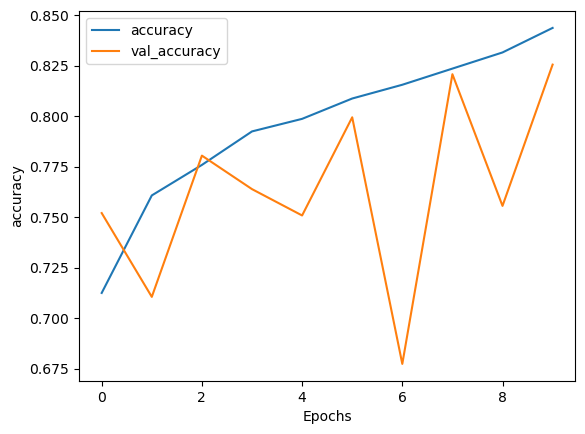

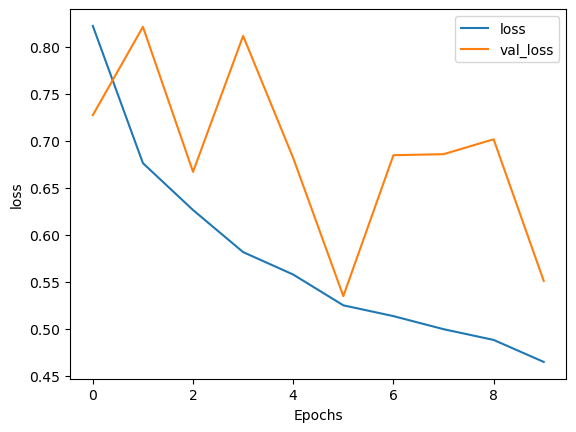

In [31]:
def plot_graphs(history_hypermodel,string):
    plt.plot(history_hypermodel.history[string])
    plt.plot(history_hypermodel.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

plot_graphs(history_hypermodel, "accuracy")
plot_graphs(history_hypermodel, "loss")

actual label: glaucoma
1/1 [==============================] - 1s 672ms/step
predicted label: normal


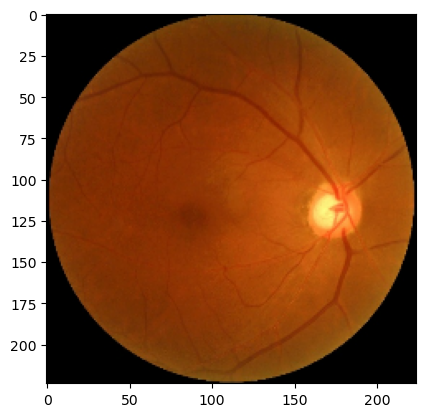

In [32]:
labels = train.class_names
labels
for images_batch, labels_batch in val.take(1):
    
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    plt.imshow(image)
    print("actual label:", labels[label])
    
    batch_prediction = hypermodel.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

1/1 [==============================] - 0s 40ms/step


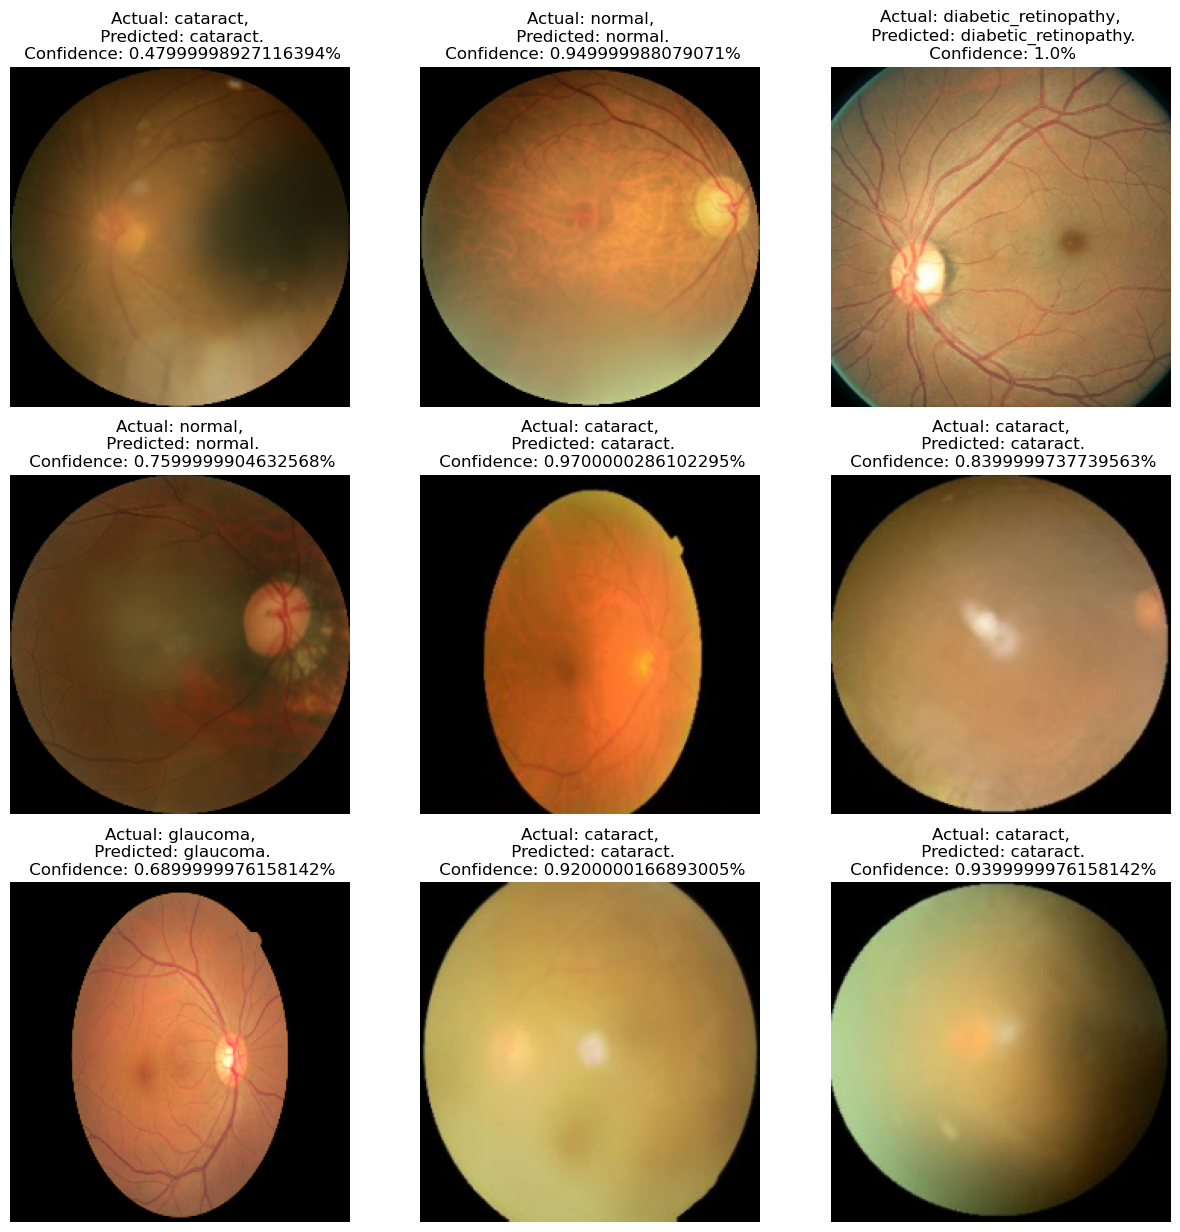

In [34]:
plt.figure(figsize=(15, 15))

for images, lbs in val.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict(hypermodel, images[i])
        actual_class = labels[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")